# PROJECT 1: IRIS FLOWER CLASSIFICATION

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

Although the Scikit-learn library provides a dataset for iris flower classification, you can also
download the same dataset from here for the task of iris flower classification with Machine
Learning. 

In [7]:
# import all required libaries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [8]:
irisdf = pd.read_csv("iris.csv")
#first 5 dataset
irisdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#last 5 dataset 
irisdf.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


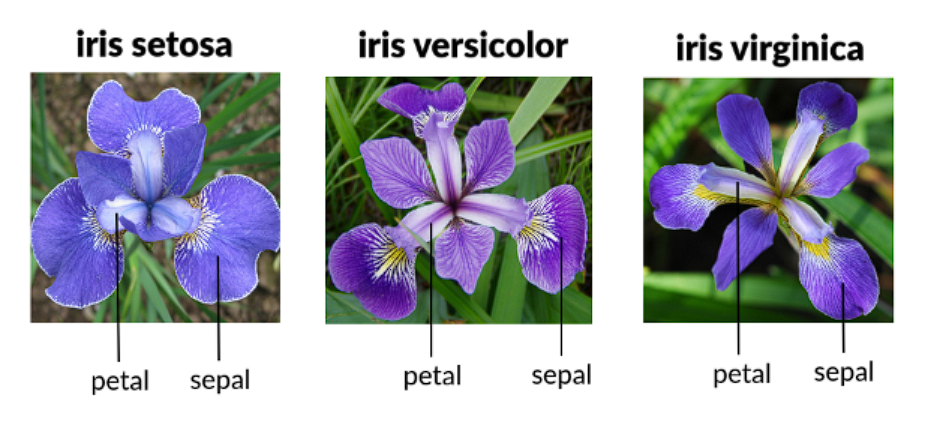

In [10]:
from IPython import display
display.Image("Iris.png")

In [11]:
#description of dataset
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
# Dimension of data set
irisdf.shape

(150, 6)

In [13]:
irisdf.size

900

In [14]:
#check for values of each species whether its balanced or imbalanced
irisdf['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

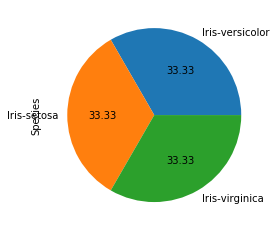

In [15]:
# Visualization in form of pie chart
import pandas as pd

irisdf = pd.read_csv("iris.csv")
irisdf['Species'].value_counts().plot(kind='pie',autopct='%.2f')

## PREPROCESSING THE DATASET

In [16]:
#Check if any null values is present in give dataset 
irisdf.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
#Check for duplicate values
duplicate_count = irisdf.duplicated().sum()
print(duplicate_count)  

0


## EXPLORATORY DATA ANALYSIS

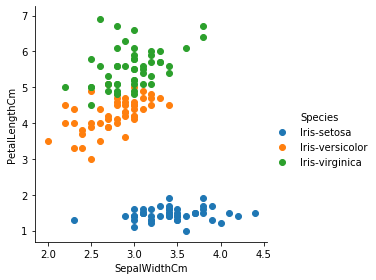

In [18]:
#Scatter Plot to  visualize the datset 
sns.FacetGrid(irisdf,hue='Species',height=4).map(plt.scatter,"SepalWidthCm" , "PetalLengthCm").add_legend()

So, from here we can conclude that 100 percent accuracy in iris setosa as its points are far from other two species.

## Let's visualize different columns with species

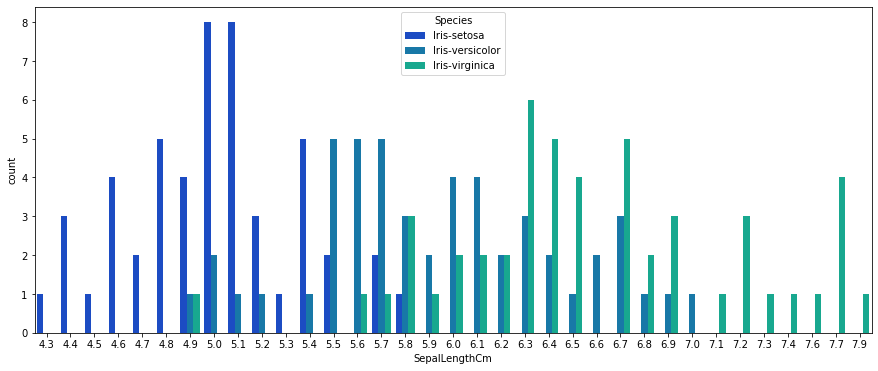

In [19]:
plt.figure(figsize =(15,6))
sns.countplot(x='SepalLengthCm', data=irisdf, hue= irisdf['Species'], palette= 'winter')
plt.show()

## So, from here we conclude that flowers more density with higher sepal length is virginica

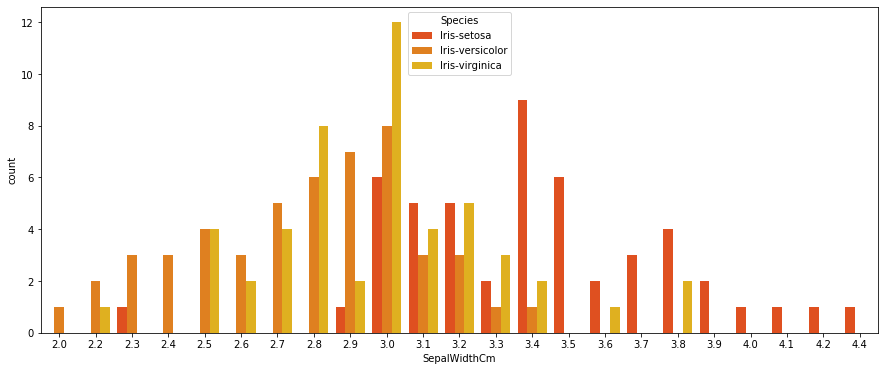

In [20]:
plt.figure(figsize =(15,6))
sns.countplot(x='SepalWidthCm', data=irisdf, hue= irisdf['Species'], palette= 'autumn')
plt.show()

## So, in this density of sepal with setosa is more.

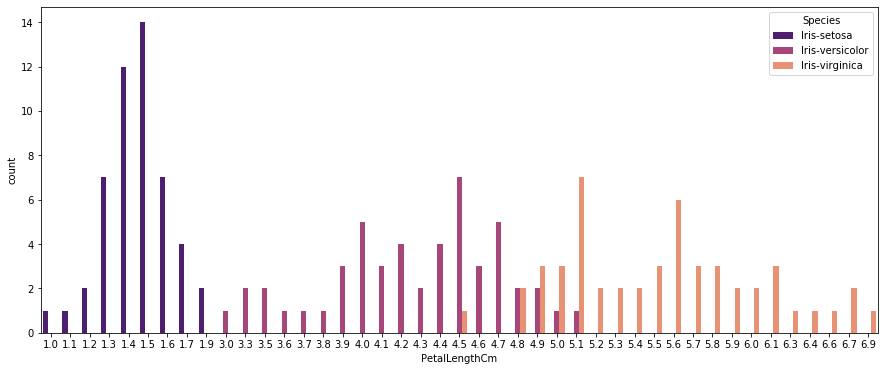

In [21]:
plt.figure(figsize =(15,6))
sns.countplot(x='PetalLengthCm', data=irisdf, hue= irisdf['Species'], palette= 'magma')
plt.show()

## Infrence which we got from this plot is density setosa is lower for petal length 

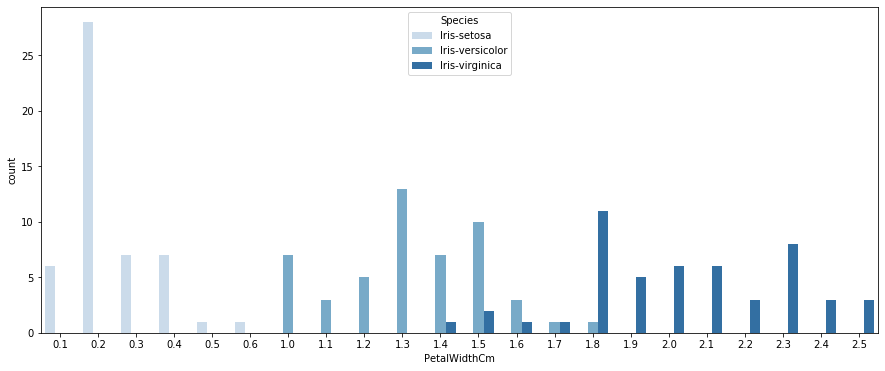

In [22]:
plt.figure(figsize =(15,6))
sns.countplot(x='PetalWidthCm', data=irisdf, hue= irisdf['Species'], palette= 'Blues')
plt.show()

## Here, for this plot density of setosa is more on lower petal length.

In [23]:
#Coorelation matrix- if we have high correation then we can neglect one variables tht is positive correaltion i;e 0 to 1
irisdf.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


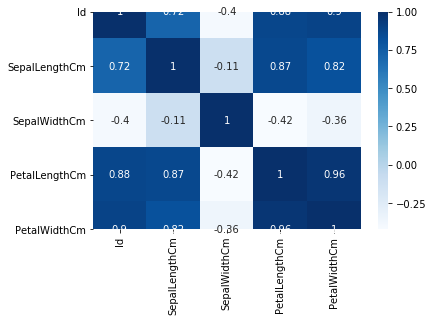

In [24]:
# Coor in form of heat map
corr = irisdf.corr()
sns.heatmap(corr,annot=True,cmap='Blues')

we perform corr to find relation between each variables.

## PREPARE THE TRAINING SET 


### HERE, X= feature values, all the coloumns except the last column y= target values i;e last column

In [25]:
flower_mapping= {'Iris-setosa': 0, 'Iris-versicolor' : 1, 'Iris-virginica' :2}
irisdf['Species'] = irisdf ['Species'].map (flower_mapping)


In [26]:
irisdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [27]:
irisdf.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [28]:
x=irisdf[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values
y=irisdf[['Species']].values

In [29]:
model = lr()

In [30]:
model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
expected = y
predicted = model.predict(x)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [32]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.90      0.94        50
           2       0.91      0.98      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [33]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]
